# Prepare the data

## Load the data

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', None) 
df = pd.read_pickle('data/allocine_dataset.pickle')

##################################################

# import pickle

# PICKLE_PATH = "data/allocine_dataset.pickle"

# with open(PICKLE_PATH, 'rb') as reader:
#     df = pickle.load(reader)

In [10]:
df_train = df['train_set']  # df_train, df_test = train_test_split(df)
df_val = df['val_set']
df_test = df['test_set']

# Reviews need to be tokenized
train_reviews = np.array(df_train['review'])
val_reviews = np.array(df_val['review'])
test_reviews = np.array(df_test['review'])

train_labels = df_train['polarity']
val_labels = df_val['polarity']
test_labels = df_test['polarity']
class_names = df['class_names']

In [67]:
# df_train.head(1)
# df_train['review'].head(1)
df_test.head(1)

film-url  \
0  http://www.allocine.fr/film/fichefilm-25385/critiques/spectateurs   

                                                                                                                                                                                                review  \
0  Magnifique épopée, une belle histoire, touchante avec des acteurs qui interprètent très bien leur rôles (Mel Gibson, Heath Ledger, Jason Isaacs...), le genre de film qui se savoure en famille! :)   

   polarity  
0         1

## Preprocessing

In [11]:
from gensim.utils import simple_preprocess

# Tokenize the text column to get the new column 'tokenized_text'
df_train['tk_review'] = df_train['review'].apply(lambda x : simple_preprocess(x)) 
df_val['tk_review'] = df_val['review'].apply(lambda x : simple_preprocess(x)) 
df_test['tk_review'] = df_test['review'].apply(lambda x : simple_preprocess(x)) 

In [94]:
# df_test['tk_review'].head(1)

0    [magnifique, épopée, une, belle, histoire, touchante, avec, des, acteurs, qui, interprètent, très, bien, leur, rôles, mel, gibson, heath, ledger, jason, isaacs, le, genre, de, film, qui, se, savoure, en, famille]
Name: tk_review, dtype: object

### Tokenization

Maintenant que le texte est nettoyé, nous pouvons procéder à l'encodage de celui-ci.

In [4]:
import tensorflow as tf

MAX_NB_WORDS = 50000 # tweak this params to get better results
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=MAX_NB_WORDS, oov_token="<unk>")
tokenizer.fit_on_texts(train_reviews)
word_index = tokenizer.word_index

print("Found {} unique tokens.".format(len(word_index)))

Found 186308 unique tokens.


In [71]:
# word_index.items()

In [5]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
train_reviews_tokenized = tokenizer.texts_to_sequences(train_reviews)
val_reviews_tokenized = tokenizer.texts_to_sequences(val_reviews)
test_reviews_tokenized = tokenizer.texts_to_sequences(test_reviews)

In [49]:
# train_reviews_tokenized

In [75]:
# def tokenize(texts, texts_train, texts_val, texts_test):
#     MAX_NB_WORDS = 50000 # tweak this params to get better results
#     tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=MAX_NB_WORDS, oov_token="<unk>")
#     tokenizer.fit_on_texts(texts)
#     word_index = tokenizer.word_index
#     print("Found {} unique tokens.".format(len(word_index)))

#     sequences_train = tokenizer.texts_to_sequences(texts_train)
#     sequences_val = tokenizer.texts_to_sequences(texts_val)
#     sequences_test = tokenizer.texts_to_sequences(texts_test)
#     return word_index, sequences_train, sequences_val, sequences_test 

# tokenize(train_reviews, train_reviews, val_reviews, test_reviews)

Found 186308 unique tokens.


({'<unk>': 1,
  'de': 2,
  'et': 3,
  'le': 4,
  'la': 5,
  'un': 6,
  'à': 7,
  'film': 8,
  'les': 9,
  'est': 10,
  'qui': 11,
  'en': 12,
  'une': 13,
  'des': 14,
  'pas': 15,
  'que': 16,
  'du': 17,
  'ce': 18,
  'dans': 19,
  'pour': 20,
  'mais': 21,
  'a': 22,
  'on': 23,
  'ne': 24,
  'il': 25,
  'plus': 26,
  'avec': 27,
  'au': 28,
  'très': 29,
  'se': 30,
  "c'est": 31,
  'par': 32,
  'tout': 33,
  'bien': 34,
  'je': 35,
  'son': 36,
  'sur': 37,
  'sont': 38,
  'même': 39,
  'fait': 40,
  'sans': 41,
  'comme': 42,
  'nous': 43,
  'peu': 44,
  'si': 45,
  'sa': 46,
  'cette': 47,
  'ou': 48,
  'bon': 49,
  'voir': 50,
  'aussi': 51,
  'ça': 52,
  'scénario': 53,
  "d'un": 54,
  'acteurs': 55,
  'ses': 56,
  'vraiment': 57,
  'faire': 58,
  'y': 59,
  "d'une": 60,
  'scène': 61,
  "n'est": 62,
  'rien': 63,
  'peut': 64,
  'être': 65,
  "j'ai": 66,
  'trop': 67,
  'vous': 68,
  'aux': 69,
  "qu'il": 70,
  'personnages': 71,
  'grand': 72,
  'deux': 73,
  'films': 74,
  

In [76]:
# train_reviews, train_reviews_tokenized, val_reviews_tokenized, test_reviews_tokenized = tokenize(train_reviews, train_reviews, val_reviews, test_reviews)

Found 186308 unique tokens.


In [67]:
# some_review = train_reviews_tokenized[0]
# some_review[:15]

[45, 68, 4664, 17, 77, 15081, 7, 80, 9, 8746, 2505, 249, 439, 17, 1181]

In [68]:
# index_to_word = dict((i, w) for w, i in tokenizer.word_index.items())
# " ".join([index_to_word[i] for i in some_review[:15]])

"si vous cherchez du cinéma abrutissant à tous les étages n'ayant aucune peur du cliché"

Il est important de réaliser le padding des différentes reviews afin d'avoir la même input size pour chacune d'entre elle. On calcule la longueur de chacune et on décide du threshold.

count    200000.000000
mean         91.479345
std          75.830984
min           0.000000
25%          33.000000
50%          66.000000
75%         130.000000
95%         255.000000
99%         321.000000
99.9%       347.000000
max         389.000000
dtype: float64
Average length: 91.5
Max length: 389


c:\Users\arthu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Number of words')]

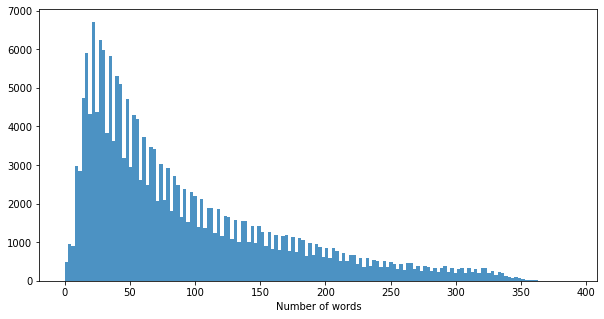

In [85]:
# reviews_len = [len(s) for s in train_reviews_tokenized + val_reviews_tokenized + test_reviews_tokenized]
# reviews_len = pd.Series(reviews_len)

# print(reviews_len.describe(percentiles=[.25, .50, .75, 0.95, 0.99, 0.999]))
# print("Average length: {:.1f}".format(np.mean(reviews_len)))
# print("Max length: {}".format(max(reviews_len)))

# plt.figure(figsize=(10,5))
# ax = sns.distplot(reviews_len, bins=150, kde=False, hist_kws=dict(alpha=0.8))
# ax.set(xlabel='Number of words')

99.9% des valeurs sont inférieur à 347. On retient donc comme longueur maximale d'une review 350.

In [45]:
# import tensorflow
# print(tensorflow.__version__)

2.5.0


### Padding

In [46]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_LEN = 350

X_train = pad_sequences(train_reviews_tokenized, maxlen=MAX_LEN, padding='post')
X_val = pad_sequences(val_reviews_tokenized, maxlen=MAX_LEN, padding='post')
X_test = pad_sequences(test_reviews_tokenized, maxlen=MAX_LEN, padding='post')

In [86]:
# print('Shape of X_train tensor:', X_train.shape)
# print('Shape of X_val tensor:', X_val.shape)
# print('Shape of X_test tensor:', X_test.shape)

Shape of X_train tensor: (160000, 350)
Shape of X_val tensor: (20000, 350)
Shape of X_test tensor: (20000, 350)


### Labels

In [87]:
y_train = np.array(train_labels)
y_val = np.array(val_labels)
y_test = np.array(test_labels)

In [88]:
# y_test = y_test[1:]
# print(y_test.shape)

(19999,)


In [89]:
# y_test = np.array(y_test)
# y_test.shape

(19999,)

# Modeling

## I. Word2Vec

Il existe deux variantes du Word2vec, les deux utilisent un réseau de neurones à 3 couches (1 couche d’entrée, 1 couche cachée, 1 couche de sortie) : Common Bag Of Words (CBOW) et Skip-gram.

On s'intéresse ici à CBOW : Le modèle est nourri par le contexte, et prédit le mot cible.

Tout d'abord, il nous faut entraîner le tokenizer sur le train set.

### Model

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense

MAX_NB_WORDS = 50000 # tweak this params to get better results

model = Sequential(name='Word2Vec')

model.add(Embedding(MAX_NB_WORDS, 300, input_shape=[None]))
model.add(GlobalAveragePooling1D())
model.add(Dense(1, activation="sigmoid"))

model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [91]:
# initial_weights = model.get_weights()
# model.summary()

Model: "Word2Vec"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 300)         15000000  
_________________________________________________________________
global_average_pooling1d (Gl (None, 300)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 301       
Total params: 15,000,301
Trainable params: 15,000,301
Non-trainable params: 0
_________________________________________________________________


### Training

In [92]:
# import tensorflow as tf

callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='data/cbow_weights.hdf5',
    save_best_only=True, 
    verbose=1
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10, batch_size=128, 
    callbacks=[callback], verbose=1)

Epoch 1/10
1250/1250 [==============================] - 217s 173ms/step - loss: 0.4207 - accuracy: 0.8374 - val_loss: 0.2592 - val_accuracy: 0.9130

Epoch 00001: val_loss improved from inf to 0.25922, saving model to data\cbow_weights.hdf5
Epoch 2/10
1250/1250 [==============================] - 226s 181ms/step - loss: 0.2212 - accuracy: 0.9219 - val_loss: 0.2134 - val_accuracy: 0.9237

Epoch 00002: val_loss improved from 0.25922 to 0.21336, saving model to data\cbow_weights.hdf5
Epoch 3/10
1250/1250 [==============================] - 228s 183ms/step - loss: 0.1797 - accuracy: 0.9348 - val_loss: 0.2087 - val_accuracy: 0.9241

Epoch 00003: val_loss improved from 0.21336 to 0.20871, saving model to data\cbow_weights.hdf5
Epoch 4/10
1250/1250 [==============================] - 223s 178ms/step - loss: 0.1572 - accuracy: 0.9429 - val_loss: 0.2004 - val_accuracy: 0.9286

Epoch 00004: val_loss improved from 0.20871 to 0.20041, saving model to data\cbow_weights.hdf5
Epoch 5/10
1250/1250 [======

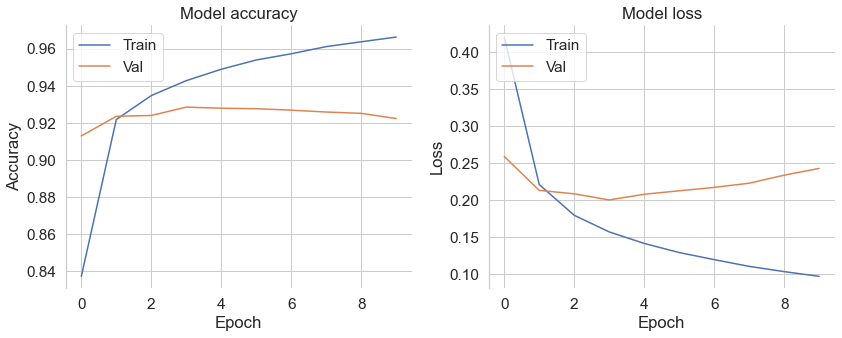

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.4)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_title('Model accuracy')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Val'], loc='upper left')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('Model loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Val'], loc='upper left')

##################################################

# fig = plot_training_curves(history)

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)


In [94]:
model.load_weights('data/cbow_weights.hdf5')

probas = model.predict(X_test[1:])
y_pred = (probas > 0.5).astype(np.int)

In [95]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9273    0.9357    0.9315     10408
           1     0.9296    0.9204    0.9250      9591

    accuracy                         0.9284     19999
   macro avg     0.9285    0.9281    0.9282     19999
weighted avg     0.9284    0.9284    0.9284     19999



Text(0.5, 17.5, 'Predicted label')

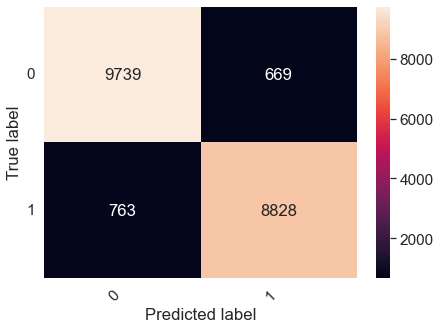

In [96]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(conf_mx)
fig = plt.figure(figsize=(7,5))

heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(
    heatmap.yaxis.get_ticklabels(), rotation=0,
    ha='right')
heatmap.xaxis.set_ticklabels(
    heatmap.xaxis.get_ticklabels(), rotation=45,
    ha='right')

plt.ylabel('True label')
plt.xlabel('Predicted label')

## II. FastText


FastText est capable d'obtenir de très bonnes performances pour la représentation des mots et la classification des phrases, en particulier dans le cas de mots rares, en utilisant les informations au niveau des caractères.

In [97]:
# import fasttext.util

# pre-trained word vectors (here we will train fasttext from scratch instead)
# fasttext.util.download_model('fr', if_exists='ignore')  # French
# ft = fasttext.load_model('cc.fr.300.bin')

fastText expects the category first, with the prefix ‘__label__’ before each category, and then the preprocessed input text. The next steps are happening under the hood.

In [12]:
train = pd.concat([train_labels, df_train['tk_review']], axis=1)
val = pd.concat([val_labels, df_val['tk_review']], axis=1)
test = pd.concat([test_labels, df_test['tk_review']], axis=1)
test.head()

polarity  \
0         1   
1         0   
2         1   
3         0   
4         0   

                                                                                                                                                                                                                                                                                                                                                                         tk_review  
0                                                                                                                                                             [magnifique, épopée, une, belle, histoire, touchante, avec, des, acteurs, qui, interprètent, très, bien, leur, rôles, mel, gibson, heath, ledger, jason, isaacs, le, genre, de, film, qui, se, savoure, en, famille]  
1  [je, ai, pas, aimé, mais, pourtant, je, lui, mets, étoiles, car, expérience, est, louable, rien, de, conventionnel, ici, une, visite, mais, jonchée, idées, originales, le, soucis, tout, ceci, avait, il, vraiment, sa, place, dans, un, film, de, tirant, sur, horreur, voici, un, film, qui, inverse, de, tant, autres, qui, ont, droit, mériterait, peut, être, un, remake]  
2                                                                                                                                                                                                                                                                                                             [un, dessin, animé, qui, brille, par, sa, féerie, et, ses, chansons]  
3                                                                                                                                                                                           [si, est, là, le, renouveau, du, cinéma, français, est, tout, de, même, foutrement, chiant, si, objet, est, très, stylisé, et, la, tension, palpable, le, film, paraît, plutôt, creux]  
4                                                                                                                                                                                                                                                                    [et, pourtant, on, en, doutait, second, volet, très, mauvais, sans, fraîcheur, et, lourdingue, quel, dommage]

In [13]:
# Prefixing each row of the category column with '__label__'
train.iloc[:, 0] = train.iloc[:, 0].apply(lambda x: '__label__' + str(x))
val.iloc[:, 0] = val.iloc[:, 0].apply(lambda x: '__label__' + str(x))
test.iloc[:, 0] = test.iloc[:, 0].apply(lambda x: '__label__' + str(x))
test.head()

polarity  \
0  __label__1   
1  __label__0   
2  __label__1   
3  __label__0   
4  __label__0   

                                                                                                                                                                                                                                                                                                                                                                         tk_review  
0                                                                                                                                                             [magnifique, épopée, une, belle, histoire, touchante, avec, des, acteurs, qui, interprètent, très, bien, leur, rôles, mel, gibson, heath, ledger, jason, isaacs, le, genre, de, film, qui, se, savoure, en, famille]  
1  [je, ai, pas, aimé, mais, pourtant, je, lui, mets, étoiles, car, expérience, est, louable, rien, de, conventionnel, ici, une, visite, mais, jonchée, idées, originales, le, soucis, tout, ceci, avait, il, vraiment, sa, place, dans, un, film, de, tirant, sur, horreur, voici, un, film, qui, inverse, de, tant, autres, qui, ont, droit, mériterait, peut, être, un, remake]  
2                                                                                                                                                                                                                                                                                                             [un, dessin, animé, qui, brille, par, sa, féerie, et, ses, chansons]  
3                                                                                                                                                                                           [si, est, là, le, renouveau, du, cinéma, français, est, tout, de, même, foutrement, chiant, si, objet, est, très, stylisé, et, la, tension, palpable, le, film, paraît, plutôt, creux]  
4                                                                                                                                                                                                                                                                    [et, pourtant, on, en, doutait, second, volet, très, mauvais, sans, fraîcheur, et, lourdingue, quel, dommage]

In [14]:
# Saving the CSV file as a txt file
train.to_csv('data/train.txt', index = False, sep = ' ', header = None)
val.to_csv('data/val.txt', index = False, sep = ' ', header = None)
test.to_csv('data/test.txt', index = False, sep = ' ', header = None)

To improve the performance of our model the wordNgrams parameter is set to 2. In other words, the model is being trained on bigrams instead of considering individual words.

Word representation model : to learn words vectors, use fasttext.train_unsupervised : c'est de l'apprentissage non supervisé en ce sens que l'on ne fournit que le corpus de texte à l'algorithme. Il va ensuite utiliser des fenêtres contextuelles glissantes pour son entraînement.

For classification task (like here) : use fasttext.train_supervised : ici, on fournit clairement l'objectif de classification (0/1, positif/négatif), l'apprentissage de l'embedding est implicite et intervient lors de l'apprentissage.

In [15]:
# ! pip install fastText-0.9.2/fasttext-0.9.2-cp39-cp39-win_amd64.whl

In [16]:
import fasttext

hyper_params = {"lr": 0.01,
    "epoch": 20,
    "wordNgrams": 2,
    "dim": 300}     
        
# Train the model.
model = fasttext.train_supervised('data/train.txt', **hyper_params)
print("Model trained with the hyperparameter \n {}".format(hyper_params))

Model trained with the hyperparameter 
 {'lr': 0.01, 'epoch': 20, 'wordNgrams': 2, 'dim': 300}


In [17]:
def print_results(N, p, r):
    print("N\t" + str(N))
    print("P@{}\t{:.4f}".format(1, p))
    print("R@{}\t{:.4f}".format(1, r))

print_results(*model.test('data/test.txt'))

N	20000
P@1	0.9349
R@1	0.9349


Fasttext est meilleur que Word2vec, pour ce dataset. On gagne 0.55 point d'accuracy.

In [18]:
print(model.labels)

['__label__1', '__label__0']


When you want to save a supervised model file, fastText can compress it in order to have a much smaller model file by sacrificing only a little bit performance.



In [19]:
# with the previously trained `model` object, call :
model.quantize(input='data/train.txt', retrain=True)

# then display results and save the new model :
print_results(*model.test('data/test.txt'))
model.save_model("data/fasttext_model_quant.ftz")

N	20000
P@1	0.9340
R@1	0.9340


We don't lose much through quantization and the inference time will be reduced.

In [20]:
model = fasttext.load_model("data/fasttext_model_quant.ftz")

In [21]:
pred = model.predict("Magnifique épopée, une belle histoire, touchante avec des acteurs qui interprètent très bien leur rôles (Mel Gibson, Heath Ledger, Jason Isaacs...), le genre de film qui se savoure en famille! :)", k=2)
pred

(('__label__0', '__label__1'), array([0.6409803 , 0.35903966]))

In [22]:
pred = model.predict("Si vous cherchez du cinéma abrutissant à tous les étages,n'ayant aucune peur du cliché en castagnettes et moralement douteux,\"From Paris with love\" est fait pour vous.Toutes les productions Besson,via sa filière EuropaCorp ont de quoi faire naître la moquerie.Paris y est encore une fois montrée comme une capitale exotique,mais attention si l'on se dirige vers la banlieue,on y trouve tout plein d'intégristes musulmans prêts à faire sauter le caisson d'une ambassadrice américaine.Nauséeux.Alors on se dit qu'on va au moins pouvoir apprécier la déconnade d'un classique buddy-movie avec le jeune agent aux dents longues obligé de faire équipe avec un vieux lou complètement timbré.Mais d'un côté,on a un Jonathan Rhys-meyers fayot au possible,et de l'autre un John Travolta en total délire narcissico-badass,crâne rasé et bouc proéminent à l'appui.Sinon,il n'y a aucun scénario.Seulement,des poursuites débiles sur l'autoroute,Travolta qui étale 10 mecs à l'arme blanche en 8 mouvements(!!)ou laisse son associé se faire démolir la tronche pendant qu'il scrute à la jumelle.Ca pourrait être un plaisir coupable,tellement c'est \"hénaurme\",c\'est juste de la daube dans la droite lignée d'un \"Transporteur\",\"Taken\"ou \"Banlieue 13\". ", k=2)
pred
	

(('__label__0', '__label__1'), array([0.54377156, 0.45624846]))